# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [1]:
%pip install -r requirements.txt

  Using cached gymnasium-1.1.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 198.6 MB/s eta 0:00:00
Using cached gymnasium-1.1.1-py3-none-any.whl (965 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 193.1 MB/s eta 0:00:00
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 32.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 48.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 32.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 78.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 56.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 59.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 60.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 69.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

In [16]:
trained_agent, all_rewards = simulate.train('config.json')

TypeError: cannot unpack non-iterable numpy.float64 object

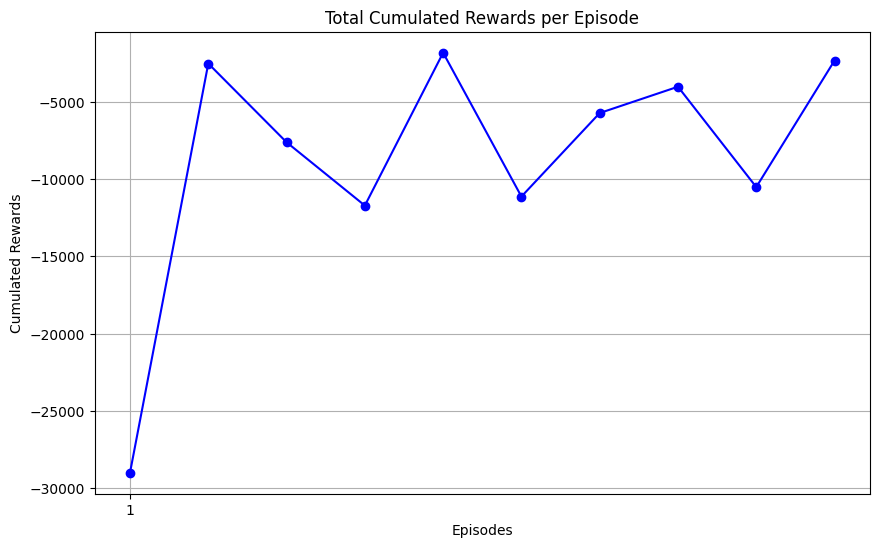

In [10]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [18]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [20]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./eval_configs/config_1.json ---
Episode 1/10, Step 35, Reward: -6008.00, Evacuated: 0, Deactivated: 4
Episode 2/10, Step 19, Reward: -3304.30, Evacuated: 0, Deactivated: 4
Episode 3/10, Step 25, Reward: -6703.30, Evacuated: 0, Deactivated: 4
Episode 4/10, Step 32, Reward: -9103.70, Evacuated: 0, Deactivated: 4
Episode 5/10, Step 8, Reward: -1901.30, Evacuated: 0, Deactivated: 4
Episode 6/10, Step 8, Reward: -1701.50, Evacuated: 0, Deactivated: 4
Episode 7/10, Step 17, Reward: -4102.70, Evacuated: 0, Deactivated: 4
Episode 8/10, Step 19, Reward: -2804.80, Evacuated: 0, Deactivated: 4
Episode 9/10, Step 21, Reward: -5802.60, Evacuated: 0, Deactivated: 4
Episode 10/10, Step 22, Reward: -6402.40, Evacuated: 0, Deactivated: 4

--- Evaluating Configuration: ./eval_configs/config_2.json ---


FileNotFoundError: [Errno 2] No such file or directory: './eval_configs/config_2.json'

In [ ]:
display(all_results)

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)